# Рост певцов хора
В
1979 году было опрошено 235 членов нью-йоркской ассоциации хорового пения, для каждого из них известен рост и регистр голоса. Меняется ли средний рост вместе с регистром?



In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import scipy.stats as st
import pandas as pd
import seaborn as sns

In [2]:
import statsmodels.api as sm


In [3]:
data =  sm.datasets.get_rdataset("singer", "lattice").data
data.head()

,height,voice.part
0,64,Soprano 1
1,62,Soprano 1
2,66,Soprano 1
3,65,Soprano 1
4,60,Soprano 1


In [4]:
data.columns = ['height', 'voice']
data['height'] *= 2.54

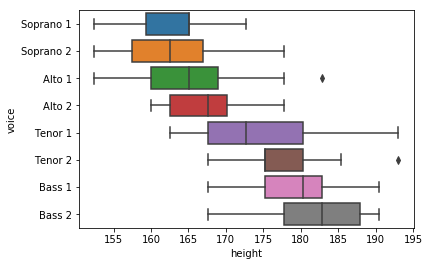

In [5]:
sns.boxplot(x='height', y='voice', data=data)

Нормальный однофакторный дисперсионный анализ:



In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [8]:
lm = ols('ваш код' ,data=data).fit()
table = sm.stats.anova_lm(lm)
table

PatsyError: error tokenizing input (maybe an unclosed string?)
    ваш код
    ^

In [9]:
data.groupby('voice').mean()

,height
voice,
Alto 1,164.809714
Alto 2,167.734074
Bass 1,179.623590
Bass 2,181.316923
Soprano 1,163.195000
Soprano 2,162.475333
Tenor 1,175.018095
Tenor 2,177.558095


Критерий Краскела-Уоллиса:

In [10]:
st.kruskal(*data.groupby('voice').groups.values())

KruskalResult(statistic=229.8276956364947, pvalue=5.399740283982908e-46)

Критерий Бартлетта:



In [12]:
st.bartlett(*data.groupby('voice').groups.values())

BartlettResult(statistic=18.417706445737398, pvalue=0.010221018996479406)

HSD Тьюки:



In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data['height'], data['voice'])
result = mc.tukeyhsd()
 
print(result)


  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
  group1    group2  meandiff  lower    upper   reject
-----------------------------------------------------
  Alto 1    Alto 2   2.9244  -2.0572   7.9059  False 
  Alto 1    Bass 1  14.8139  10.2856  19.3422   True 
  Alto 1    Bass 2  16.5072  11.4718  21.5426   True 
  Alto 1  Soprano 1 -1.6147  -6.2314   3.002   False 
  Alto 1  Soprano 2 -2.3344  -7.1733   2.5046  False 
  Alto 1   Tenor 1  10.2084   4.8401  15.5767   True 
  Alto 1   Tenor 2  12.7484   7.3801  18.1167   True 
  Alto 2    Bass 1  11.8895   7.0205  16.7586   True 
  Alto 2    Bass 2  13.5828   8.239   18.9267   True 
  Alto 2  Soprano 1 -4.5391  -9.4904   0.4123  False 
  Alto 2  Soprano 2 -5.2587  -10.4179 -0.0995   True 
  Alto 2   Tenor 1   7.284    1.6253  12.9427   True 
  Alto 2   Tenor 2   9.824    4.1653  15.4827   True 
  Bass 1    Bass 2   1.6933  -3.2307   6.6174  False 
  Bass 1  Soprano 1 -16.4286 -20.9236 -11.9335  True 
  Bass 1  Soprano 2 -17.1483

**Cleveland W. S. (1993) Visualizing Data. Summit, New Jersey: Hobart Press.**